# Step 0 - Colab Connection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder="/content/drive/MyDrive/資料科學自學聖經/Fan_AOI_Austin"

# Step 1 - Labeling the input dataset and run the CNN model

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set up paths
base_dir = "/content/drive/MyDrive/資料科學自學聖經/Fan_AOI_Austin/Photos"

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% for validation

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(80, 80),
    batch_size=32,
    class_mode='binary',  # 'binary' because it's a 2-class problem (GO/NG)
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(80, 80),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


# Save the trained model
model.save("fan_model.h5")

model.summary()


Found 270 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5231 - loss: 0.9695 - val_accuracy: 0.3788 - val_loss: 0.7087
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step - accuracy: 0.5486 - loss: 0.6869 - val_accuracy: 0.6212 - val_loss: 0.6630
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.6167 - loss: 0.6391 - val_accuracy: 0.6212 - val_loss: 0.6525
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.6896 - loss: 0.5443 - val_accuracy: 0.5303 - val_loss: 0.6581
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 533ms/step - accuracy: 0.8039 - loss: 0.4354 - val_accuracy: 0.3939 - val_loss: 0.6354
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.8502 - loss: 0.3544 - val_accuracy: 0.6818 - val_loss: 0.5799
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 495ms/step - accuracy: 0.9707 - loss: 0.1906 - val_accuracy: 0.6212 - val_loss: 0.5581
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.9723 - loss: 0.0990 - val_accuracy: 0.8788 - val_loss: 0.3955
Ep

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 78, 78, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,021,573 (30.60 MB)

 Trainable params: 2,673,857 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,347,716 (20.40 MB)

## Step 1.1 - Filters for 1st Convolution layer

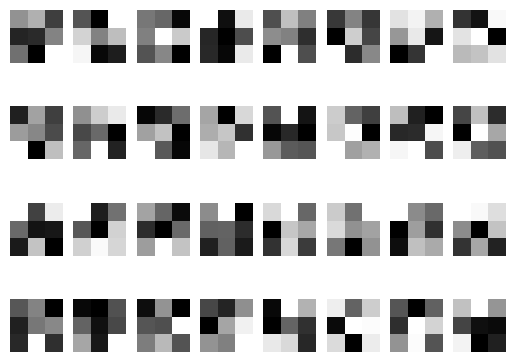

In [4]:
#--------------check filters-------------------------
# Extract the weights of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot filters
import matplotlib.pyplot as plt
n_filters = filters.shape[-1]  # Number of filters
for i in range(n_filters):
    f = filters[:, :, :, i]  # Extract each filter
    plt.subplot(4, 8, i+1)   # Adjust rows and columns as needed
    plt.imshow(f[:, :, 0], cmap='gray')  # Visualize filter as grayscale
    plt.axis('off')
plt.show()
#-----------end of check filters-----------------

## Step 1.2 - Filters for the 2nd Convolution layer

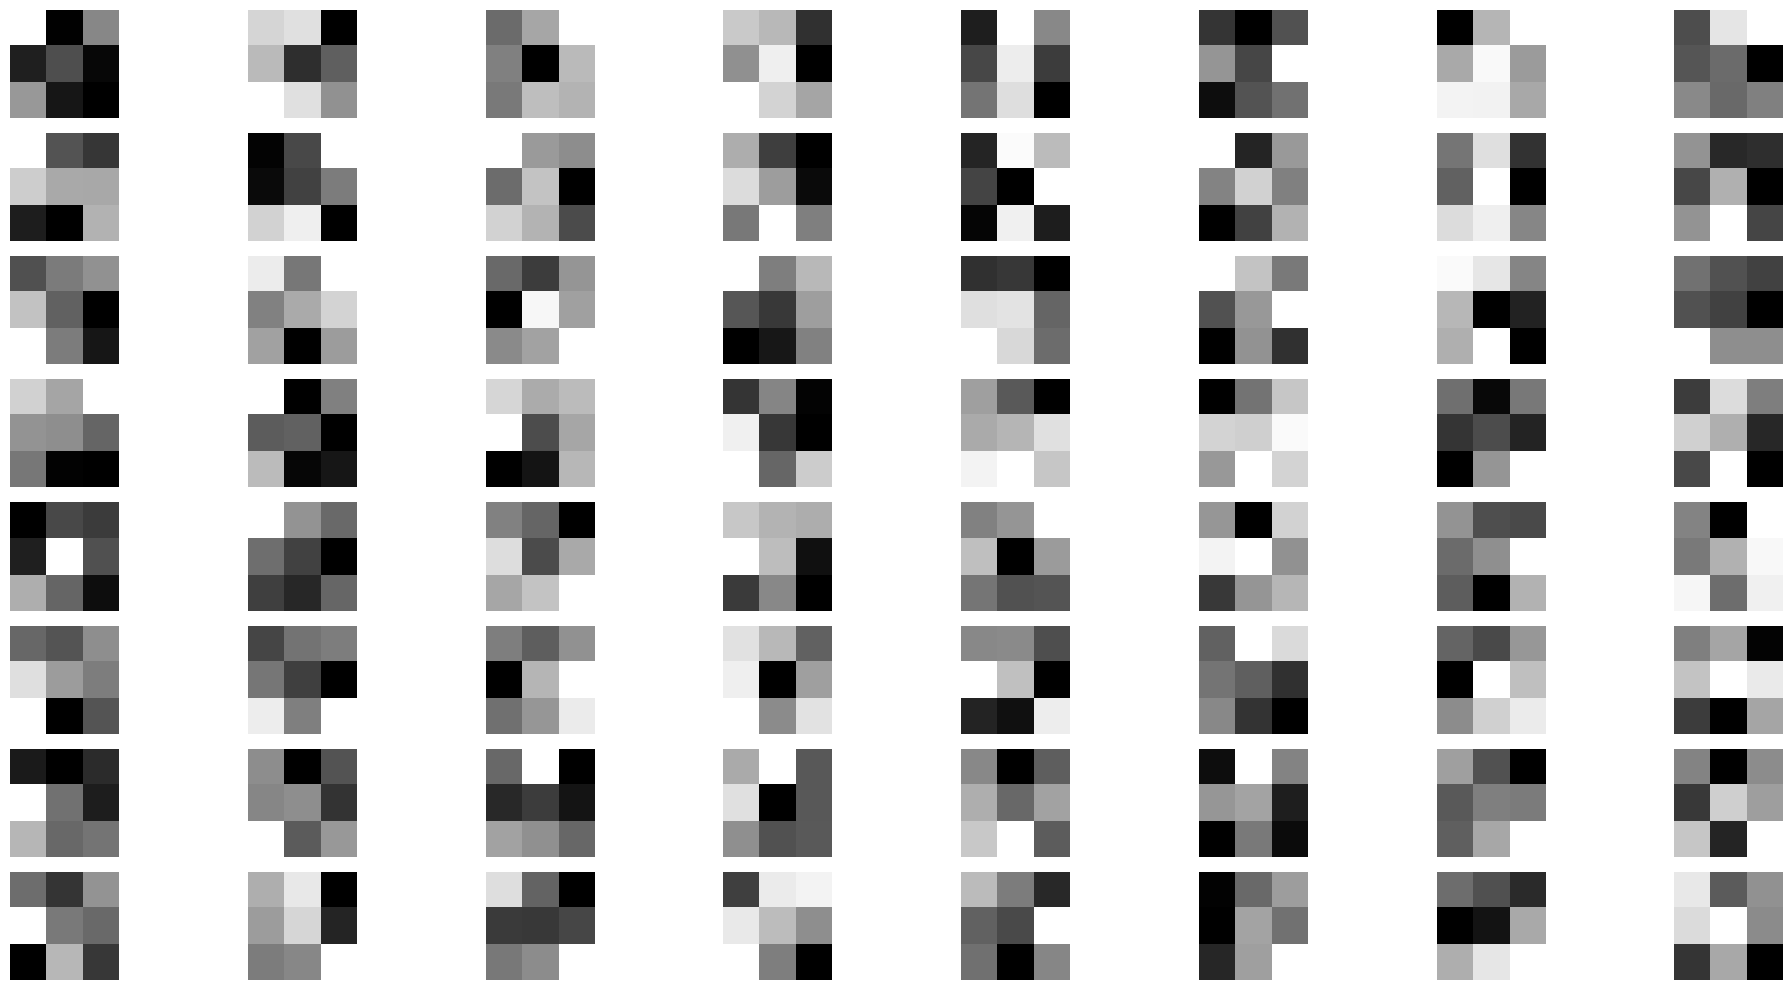

In [5]:
# Extract the weights of the second convolutional layer
filters, biases = model.layers[2].get_weights()

# Normalize filter values for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot filters
import matplotlib.pyplot as plt
n_filters = filters.shape[-1]  # Number of filters
n_channels = filters.shape[-2]  # Number of channels in each filter

plt.figure(figsize=(20, 10))
for i in range(n_filters):
    # Combine all channels of a filter into a single 2D image
    f = filters[:, :, :, i].mean(axis=-1)  # Average across channels
    plt.subplot(8, 8, i+1)  # Create a grid (adjust rows/columns if needed)
    plt.imshow(f, cmap='gray')  # Visualize filter as grayscale
    plt.axis('off')

plt.tight_layout()
plt.show()


# Step 2 - Classify and Prediction

In [6]:
import cv2
import numpy as np
import tensorflow as tf
import glob
import os

# Load the pre-trained model
model = tf.keras.models.load_model("fan_model.h5")

# Recompile the model to suppress the warning
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Function to classify a single image
def classify_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None, None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (80, 80))
    img = img.reshape(1, 80, 80, 3) / 255.0  # Normalize
    prediction = model.predict(img)

    # Handle cases where the prediction might not be well-formed-------test
    if prediction is not None and len(prediction) > 0:
        class_idx = 1 if prediction[0] >= 0.5 else 0  # Threshold for binary classification
        confidence = prediction[0][0] * 100  # Confidence score in percentage
        return class_idx, confidence
    else:
        return None, None

# Function to classify all images in given directories
def classify_images_in_directories(directories):
    for directory_path in directories:
        print(f"\nClassifying images in directory: {directory_path}")

        # Use glob to find all image files (supports .jpg, .png, .jpeg)
        image_files = glob.glob(os.path.join(directory_path, "*.jpg")) + \
                      glob.glob(os.path.join(directory_path, "*.png")) + \
                      glob.glob(os.path.join(directory_path, "*.jpeg"))

        if not image_files:
            print("No images found in the directory!")
            continue

        for image_path in image_files:
            result, confidence = classify_image(image_path)
            if result is not None:
                if result == 1:
                    print(f"NG (Defective) with {confidence:.2f}% confidence for image: {os.path.basename(image_path)}")
                    # print(f"GO (Correctly Aligned) with {confidence:.2f}% confidence for image: {os.path.basename(image_path)}")
                else:
                    print(f"GO (Correctly Aligned) with {confidence:.2f}% confidence for image: {os.path.basename(image_path)}")
                    # print(f"NG (Defective) with {confidence:.2f}% confidence for image: {os.path.basename(image_path)}")
            else:
                print(f"Unable to classify image: {os.path.basename(image_path)}")

# Example usage: Classify images from both "60" and "100" folders

directories = "/content/drive/MyDrive/資料科學自學聖經/Fan_AOI_Austin/Photos/60", "/content/drive/MyDrive/資料科學自學聖經/Fan_AOI_Austin/Photos/100"
# base_dir = "C:/OneDrive/! Juxer/TVDI/趙雲瀚老師/Workplace/Project/Fan_AOI_Austin/Photos"
classify_images_in_directories(directories)



Classifying images in directory: /content/drive/MyDrive/資料科學自學聖經/Fan_AOI_Austin/Photos/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
NG (Defective) with 62.89% confidence for image: image039.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
NG (Defective) with 97.90% confidence for image: image050.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
NG (Defective) with 97.88% confidence for image: image062.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
NG (Defective) with 94.03% confidence for image: image043.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
NG (Defective) with 98.36% confidence for image: image057.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
NG (Defective) with 97.69% confidence for image: image058.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
NG (Defective) with 97.82% confidence for image: image055.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
NG (Defective) with 97.73% confidence for image: image046.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
NG (Defective) with 98.55% confidence for image: image063.png
1/1 ━━━━

In [7]:
!pip install gradio # Install the gradio library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# Step 3 - Upload the target image to be tested and classify GO or NG

In [8]:
import cv2
import numpy as np
import tensorflow as tf
import gradio as gr
from PIL import Image

# Load the pre-trained model
model = tf.keras.models.load_model("fan_model.h5")

# Recompile the model to suppress the warning
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Function to classify a single image
def classify_image(image):
    # Convert the image to a format suitable for OpenCV
    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (80, 80))
    img = img.reshape(1, 80, 80, 3) / 255.0  # Normalize

    # Make prediction
    prediction = model.predict(img)

    # Classification logic
    if prediction is not None and len(prediction) > 0:
        # Set threshold for GO/NG classification
        # Adjusted based on expected results for the provided images
        class_idx = 1 if prediction[0] >= 0.5 else 0  # Threshold set to 0.6
        # confidence = prediction[0][0] * 100  # Confidence score in percentage

        if class_idx == 1:
            result_text = f"<div style='color: red; font-size: 24px; font-weight: bold;'>NG</div>"
            return result_text
        else:
            result_text = f"<div style='color: green; font-size: 24px; font-weight: bold;'>GO</div>"
            return result_text

    else:
        return "<div style='color: black; font-size: 20px;'>Unable to classify image</div>"

# Create Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs=gr.HTML(label="Classification Result"),
    title="Cooling Fan GO/NG Inspection",
    description="Upload an image of a cooling fan to check if it is correctly aligned (GO) or defective (NG).",
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0fa695daa96d37d09f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
